![Text](1.gif)

![Text](2.JPG)

# Dataset Information

Currently, Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.
The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour, and date information.

# Attribute Information

1. Date : year-month-day
2. Rented Bike count : Count of bikes rented at each hour
3. Hour : Hour of the day
4. Temperature : Temperature in Celsius
5. Humidity : Humidity in Percentage
6. Windspeed : Windspeed in m/s
7. Visibility (10m) : Visibility in metres
8. Dew point temperature : in Celsius
9. Solar radiation : MJ/m2
10. Rainfall : mm
11. Snowfall : cm
12. Seasons : Winter, Spring, Summer, Autumn
13. Holiday : Holiday/No holiday
14. Functional Day - No(Non Functional Hours), Yes(Functional hours)

# Agenda

The aim of our model is to predict the number of bikes that will be required each hour for rental. 

# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler    
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import datetime 
import calendar 

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('SeoulBikeData.csv',encoding='unicode_escape')
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Data Summary

In [3]:
df.shape

(8760, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The hour column has wrongly been identified as a numerical column. Hence, we will convert it to object type.

In [5]:
df['Hour'] = df['Hour'].astype(object)

1. There are 9 numerical columns, namely: Rented Bike Count, Temperature, Humidity, Wind Speed, Visibility, Dew point Temperature, Solar Radiation, Rainfall and Snowfall.
2. There are 5 categorical columns, namely: Date, Hour, Seasons, Holiday and Functioning Day. 

In [6]:
df.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


From the above statistical summary, we can see that all the quartile values for the 'Rainfall' and 'Snowfall' variables are 0. This indicates that most of the observations in these two variables are 0.

# Outlier Analysis

In [10]:
df_num = df.select_dtypes(include = np.number)

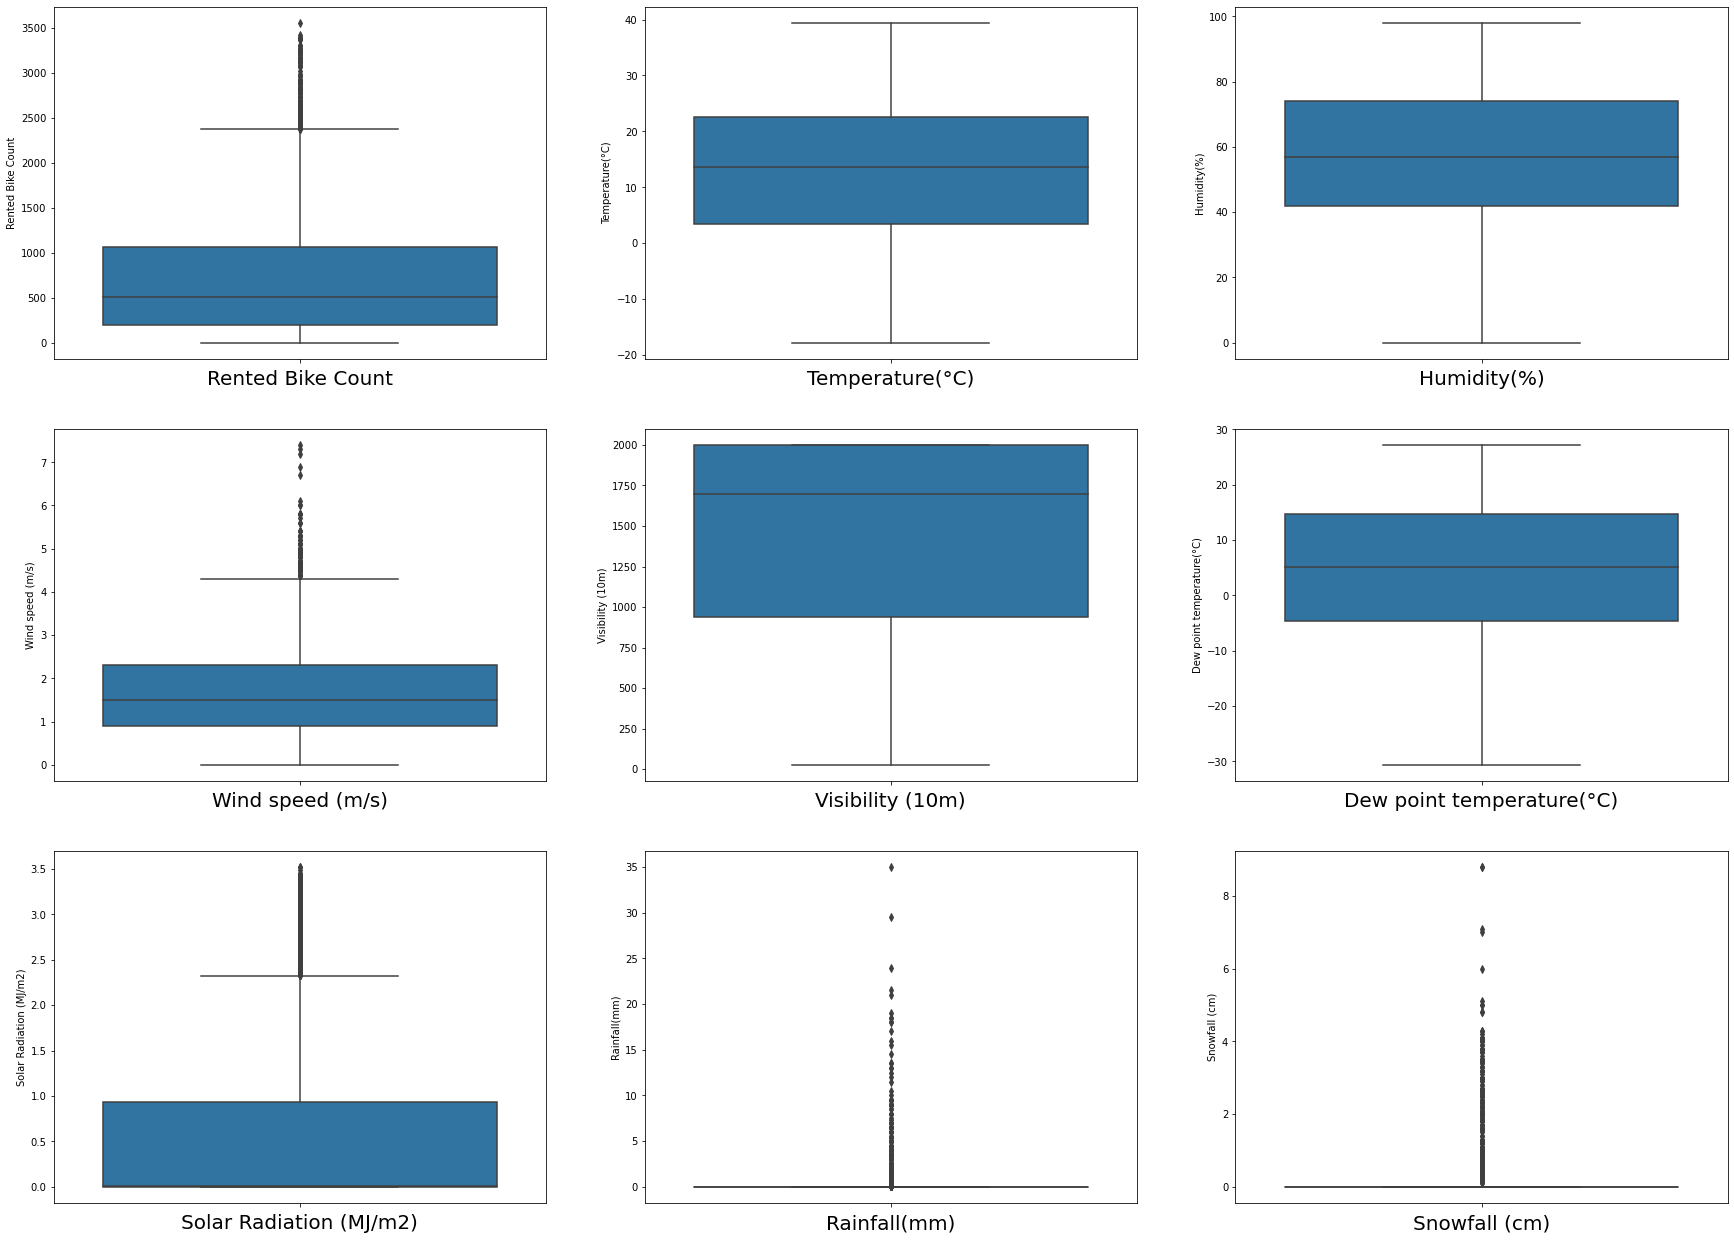

In [11]:
fig, ax = plt.subplots(3,3 , figsize=(30, 22))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "v", whis = 1.5 , ax = subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)

From the above series of boxplots, we can observe the following:
1. The variables Temperature, Humidity, Visibility and Dew Point Temperature do not have any outliers.
2. The variables Rented Bike Count, Wind Speed and Solar Radiation have significant outliers beyond the 3rd quartile.
3. The variables Rainfall and Snowfall have a lot of outliers beyond the 3rd quartiles as many observations are 0.

# Correlation Analysis

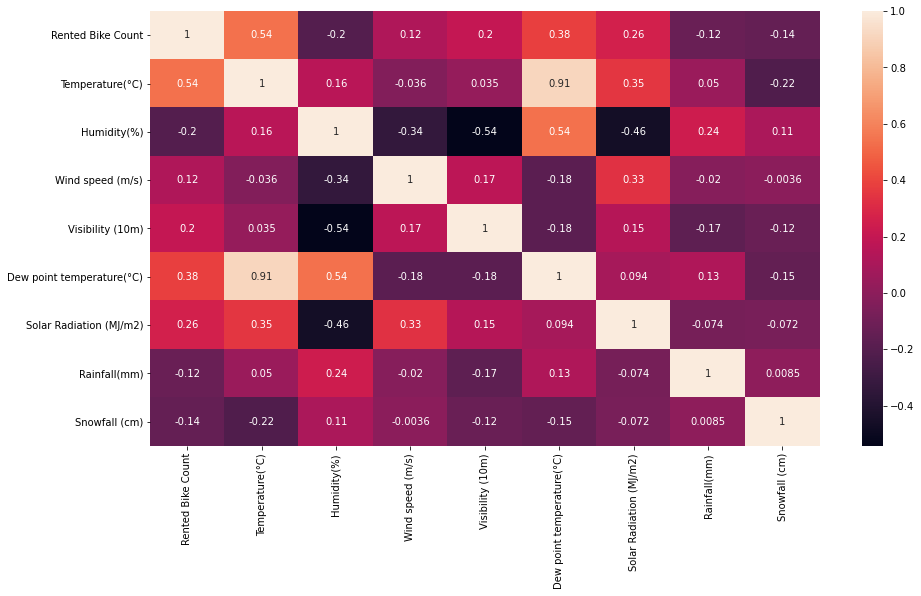

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Variance Inflation Factor

In [7]:
df_numeric_features_vif = df.drop(["Rented Bike Count"],axis=1).select_dtypes(include=[np.number])

In [8]:
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,29.075866,Temperature(°C)
1,15.201989,Dew point temperature(°C)
2,9.051931,Visibility (10m)
3,5.069743,Humidity(%)
4,4.517664,Wind speed (m/s)
5,2.821604,Solar Radiation (MJ/m2)
6,1.118903,Snowfall (cm)
7,1.079919,Rainfall(mm)


Since the VIF for Temperature(°C) and Dew point temperature(°C) is greater than 10, we proceed with removing the Dew point temperature(°C) column. 

In [9]:
df_numeric_features_vif = df.drop(["Dew point temperature(°C)"],axis=1).select_dtypes(include=[np.number])

In [10]:
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

vif["Features"] = df_numeric_features_vif.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,4.833669,Humidity(%)
1,4.714768,Visibility (10m)
2,4.415463,Temperature(°C)
3,4.214112,Wind speed (m/s)
4,3.428485,Rented Bike Count
5,2.251838,Solar Radiation (MJ/m2)
6,1.119709,Snowfall (cm)
7,1.095993,Rainfall(mm)


Since VIF is between 1 and 5 for all of the above variables, we can say that there is moderate multicorrelation.

# Data Visualization

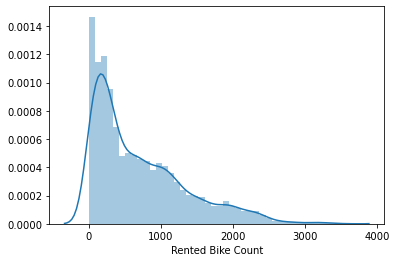

In [17]:
sns.distplot(df['Rented Bike Count'])

The distribution of Rented Bike Count shows that the data is positively skewed.

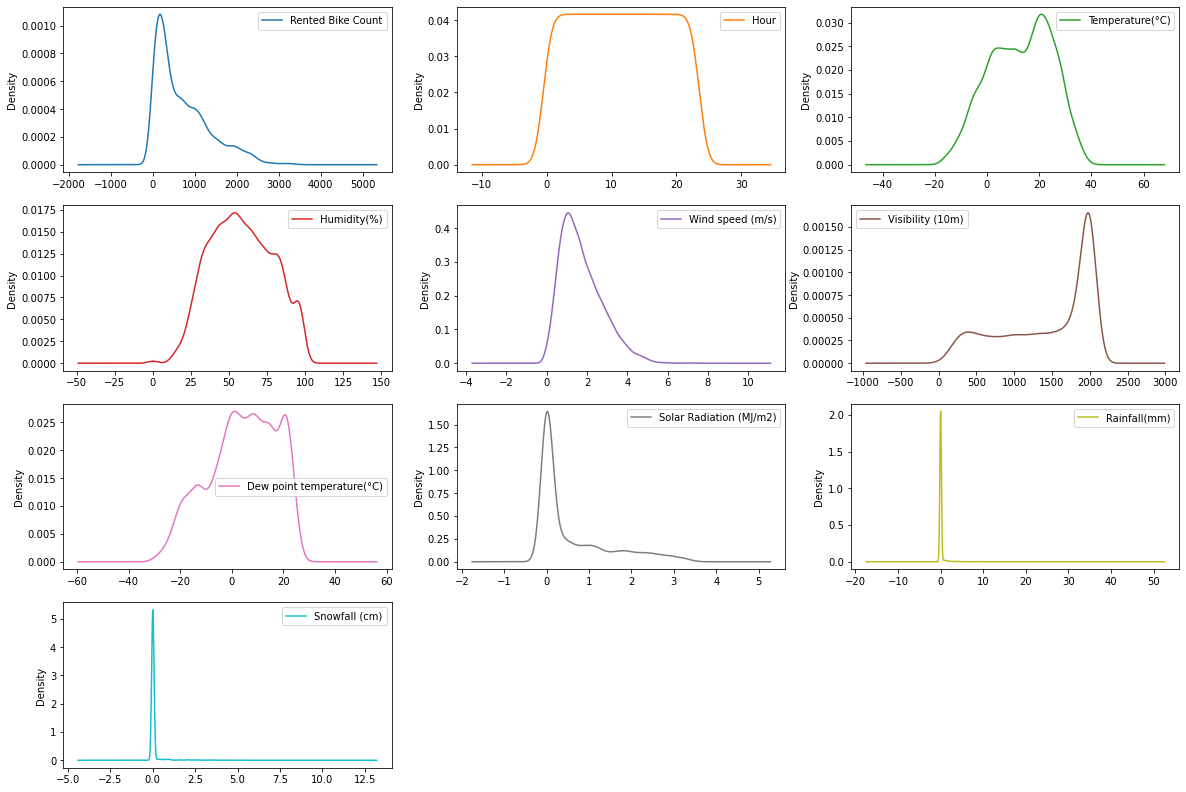

In [18]:
#Distribution of variables

plt.rcParams["figure.figsize"] = [20,14]
df.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False)
plt.show()

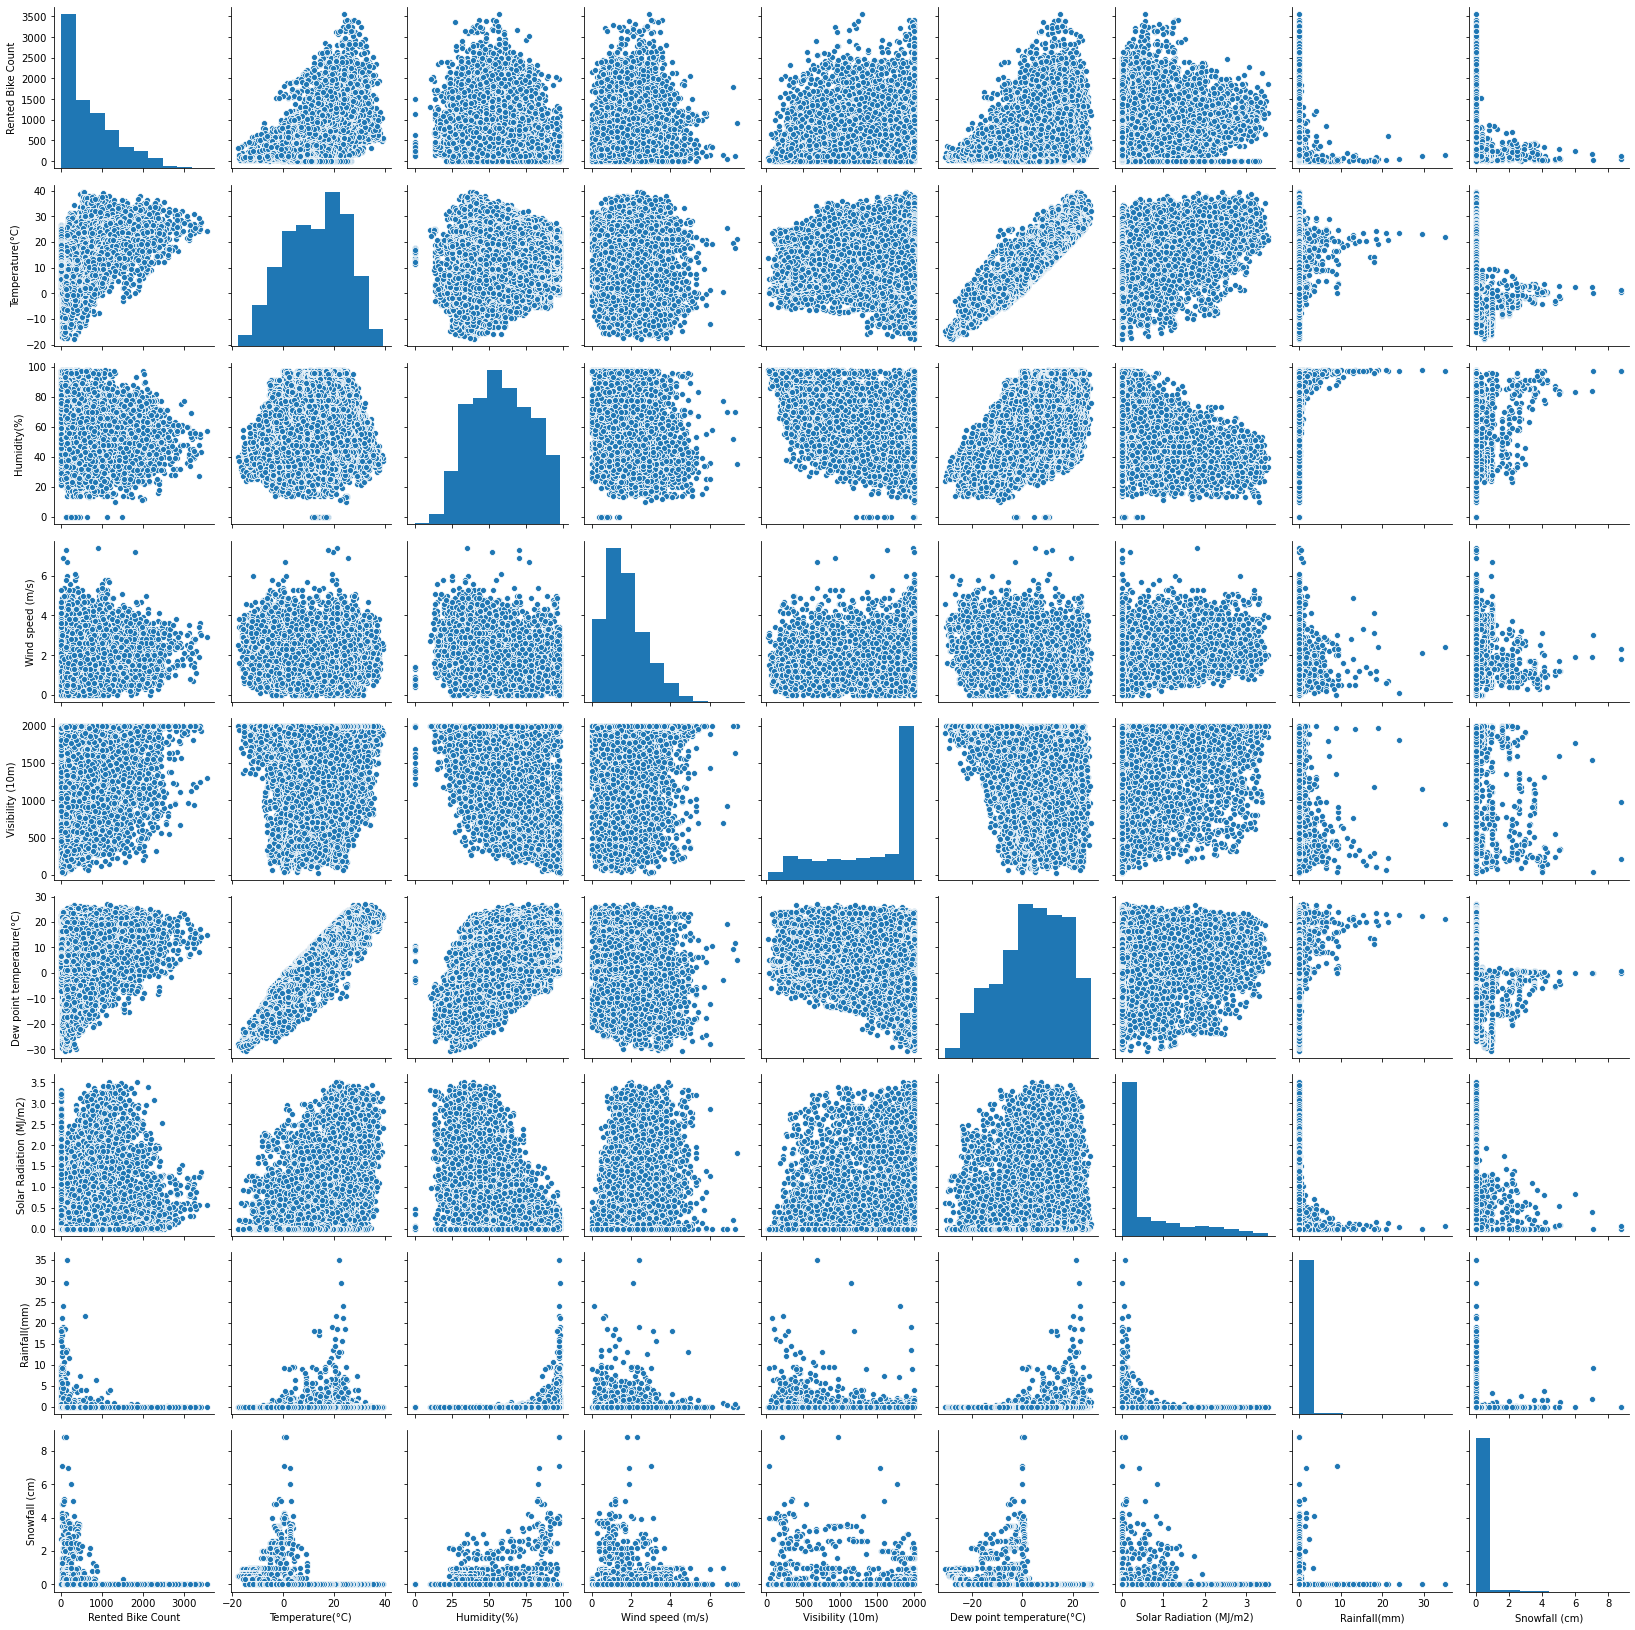

In [19]:
sns.pairplot(df_num)
plt.show()

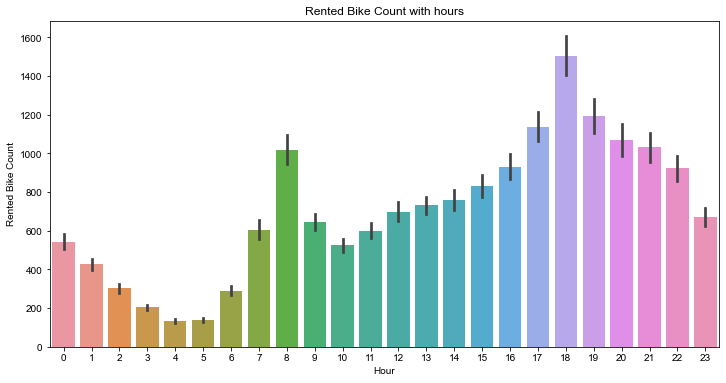

In [20]:
#Variation of rented bike count over hour

plt.figure(figsize=(12,6))
ax = sns.barplot(data = df,x = "Hour", y = "Rented Bike Count")
ax.set_title('Rented Bike Count with hours')
sns.set(style="whitegrid")

From the above plot, we can observe that bikes are rented most at 6pm and least at 4am.

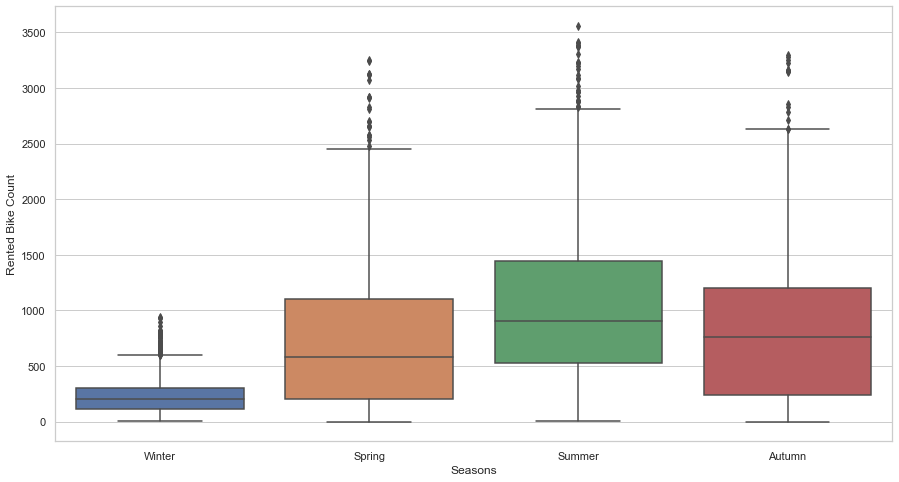

In [21]:
#Count of Rented Bikes over different seasons

plt.figure(figsize = (15,8))
sns.boxplot(df['Seasons'], df['Rented Bike Count'])
plt.show()

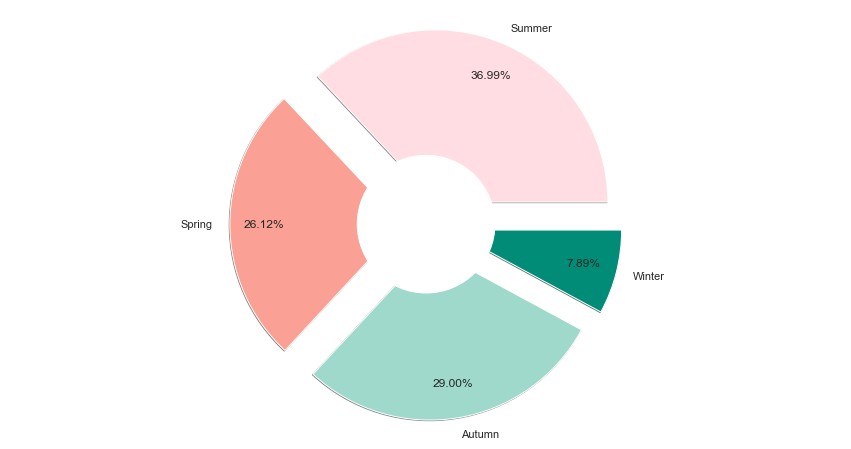

In [22]:
labels = 'Summer', 'Spring', 'Autumn','Winter'    # Doughnut Plot
sizes = [2283234, 1611909, 1790002, 487169]
colors = ['#FFDDE2FF','#FAA094FF','#9ED9CCFF','#008C76FF']
explode = (0.7, 0.7, 0.7, 0.7)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%', shadow=True,radius=5,pctdistance=0.8)
centre_circle = plt.Circle((0,0),radius=2,color='white', fc='white')
fig = plt.gcf()
fig.set_size_inches(15,8) 
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

The above plot shows that summer season sees maximum bike rentals whereas winter sees the least bike rentals.

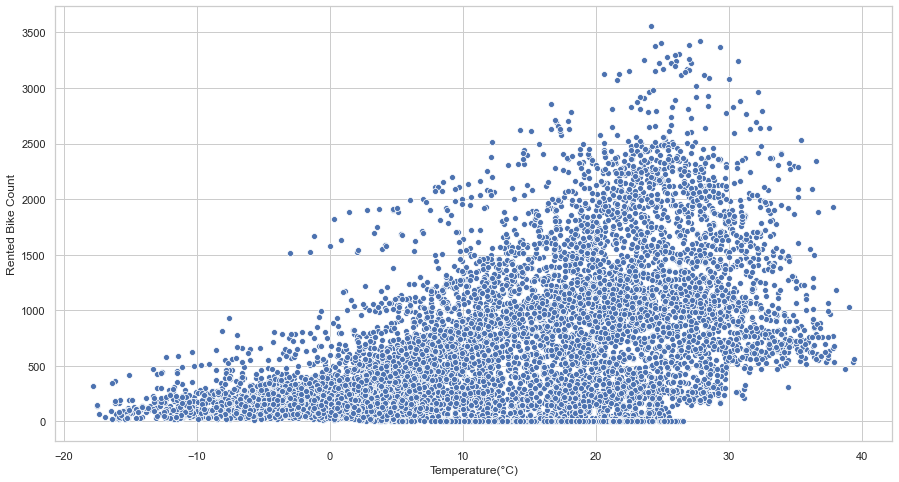

In [23]:
#Scatterplot of Rented bikes over temperature

plt.figure(figsize = (15,8)) 
sns.scatterplot('Temperature(°C)', 'Rented Bike Count', data = df)
plt.show()

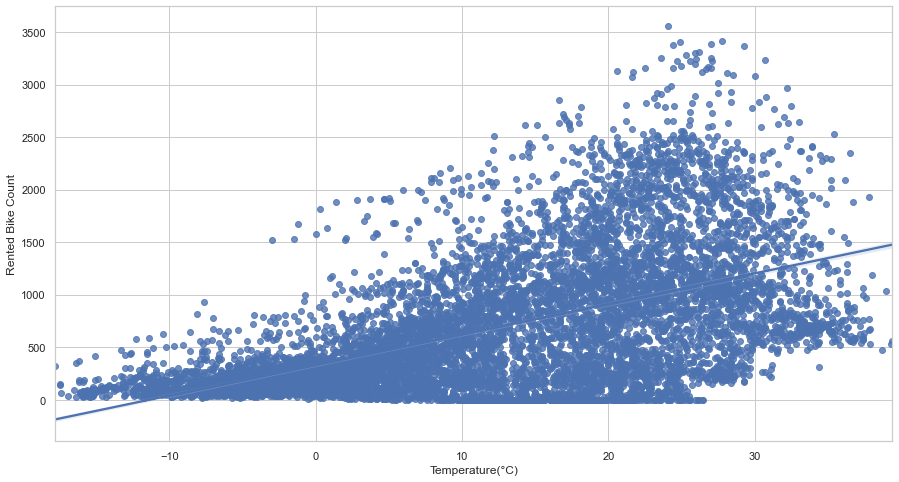

In [24]:
#Regression plot of Rented bikes over temperature

plt.figure(figsize = (15,8)) 
sns.regplot('Temperature(°C)', 'Rented Bike Count', data = df)
plt.show()

1. In the above plot, we can see that the slop of the regression line is small. Therefore, we can conclude that the correlation between temperature and bike rental counts is weakly positive.
2. The outliers having the highest value can be seen within the temperature range of 20°C to 30°C.

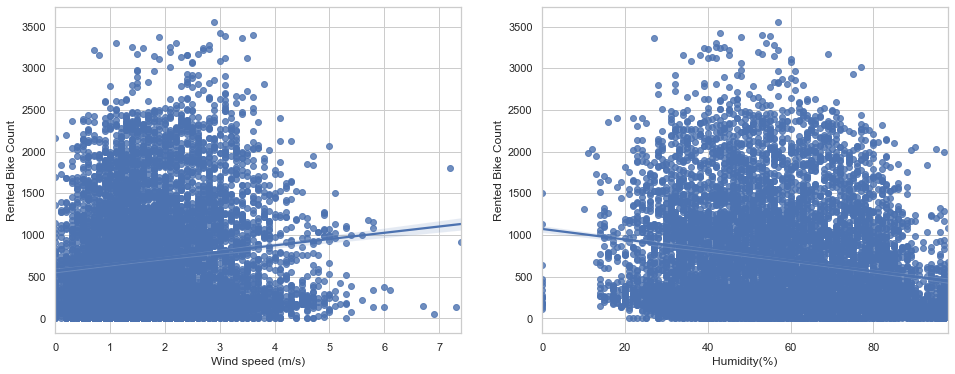

In [25]:
#Regression plots for bike rental counts over Wind Speed and Humidity

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 6)
sns.regplot(x="Wind speed (m/s)", y="Rented Bike Count", data = df, ax=ax1)
sns.regplot(x="Humidity(%)", y="Rented Bike Count", data = df, ax=ax2)

From the above plots we can observe that Wind speed and bike rental counts have a very weak positive correlation, whereas humidity and bike rental counts have a very weak negative correlation.

In [26]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Feature Engineering

The Bike Sharing dataset spans data from two years, which does not aid regression analysis. Hence, we are extracting the day and month from the date and dropping the date column.

In [11]:
def findDay(date): 
    born = datetime.datetime.strptime(date, '%d/%m/%Y').weekday() 
    return (calendar.day_name[born]) 


def findMonth(date): 
    born = datetime.datetime.strptime(date, '%d/%m/%Y')
    return born

df['month'] = pd.Series.dt.month_name(pd.DatetimeIndex(df["Date"].apply(findMonth)))
df['Day'] = df['Date'].apply(findDay)

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

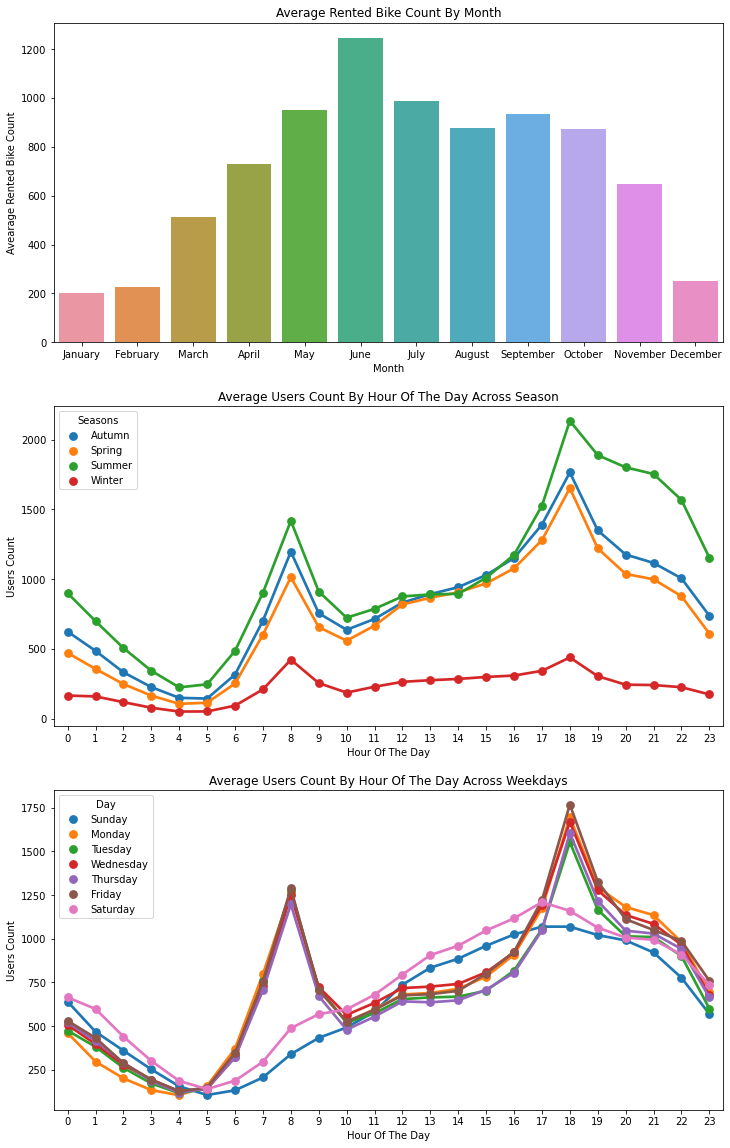

In [12]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("month")["Rented Bike Count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="Rented Bike Count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="Rented Bike Count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Rented Bike Count',title="Average Rented Bike Count By Month")

hourAggregated = pd.DataFrame(df.groupby(["Hour","Seasons"],sort=True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["Hour"], y=hourAggregated["Rented Bike Count"],hue=hourAggregated["Seasons"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(df.groupby(["Hour","Day"],sort=True)["Rented Bike Count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["Hour"], y=hourAggregated["Rented Bike Count"],hue=hourAggregated["Day"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

In [13]:
df.std()

Rented Bike Count            644.997468
Hour                           6.922582
Temperature(°C)               11.944825
Humidity(%)                   20.362413
Wind speed (m/s)               1.036300
Visibility (10m)             608.298712
Dew point temperature(°C)     13.060369
Solar Radiation (MJ/m2)        0.868746
Rainfall(mm)                   1.128193
Snowfall (cm)                  0.436746
dtype: float64

Certain columns will be removed because of:
    1. High multicollinearity
    2. Almost 0 standard deviation
    3. Insignificant for model efficiency

In [14]:
df.drop(["Date","Seasons","Dew point temperature(°C)","Snowfall (cm)","Wind speed (m/s)", "Visibility (10m)", "Day"],axis=1,inplace=True)


df_features = df.drop(["Rented Bike Count"], axis=1)
df_target = df["Rented Bike Count"]
encoding = pd.get_dummies(df_features.select_dtypes(include=object), drop_first=True)
df_features = pd.concat([df_features,encoding],axis=1)

df_features.drop(['Holiday', 'Functioning Day',"month","Hour"], axis=1, inplace=True)

In [15]:
df_features.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September'],
      dtype='object')

In [16]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

def get_score(model):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared','Train_RMSE', 'Test_RMSE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    global score_card                                
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Train_RMSE': get_train_rmse(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [17]:
y = df_target
x = df_features

In [18]:
x = x.apply(lambda x:(x-x.mean())/x.std())
x = sm.add_constant(x)

## Train test split

In [19]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Model-1

In [20]:
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     395.9
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:49:14   Log-Likelihood:                -51124.
No. Observations:                7008   AIC:                         1.023e+05
Df Residuals:                    6967   BIC:                         1.026e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     703.2285      4.272    164.613      0.000     694.854     711.603
Temperature(°C)           278.6521     13.373     20.836      0.000     252.436     304.868
Humidity(%)              -136.4542      5.839    -23.371      0.000    -147.900    -125.009
Solar Radiation (MJ/m2)    40.0038      9.047      4.422      0.000      22.270      57.738
Rainfall(mm)              -74.3300      4.732    -15.709      0.000     -83.606     -65.054
Hour_1                    -20.3568      5.940     -3.427      0.001     -32.002      -8.712
Hour_2                    -42.8787      5.940     -7.219      0.000     -54.522     -31.235
Hour_3                    -57.1547      5.963     -9.585      0.000     -68.844     -45.466
Hour_4                    -70.9239      5.968    -11.884      0.000     -82.623     -59.225
Hour_5                    -67.4576      5.962    -11.315      0.000     -79.145     -55.771
Hour_6                    -36.1821      5.953     -6.078      0.000     -47.852     -24.512
Hour_7                     23.3742      5.982      3.908      0.000      11.648      35.100
Hour_8                     89.3634      6.053     14.764      0.000      77.498     101.228
Hour_9                      9.6610      6.117      1.579      0.114      -2.331      21.653
Hour_10                   -36.7946      6.363     -5.782      0.000     -49.268     -24.321
Hour_11                   -36.4035      6.560     -5.550      0.000     -49.262     -23.545
Hour_12                   -27.1251      6.822     -3.976      0.000     -40.499     -13.751
Hour_13                   -27.7591      6.922     -4.010      0.000     -41.328     -14.191
Hour_14                   -28.9195      6.841     -4.228      0.000     -42.329     -15.510
Hour_15                   -12.8972      6.620     -1.948      0.051     -25.875       0.080
Hour_16                    12.7107      6.374      1.994      0.046       0.216      25.205
Hour_17                    66.4974      6.235     10.666      0.000      54.276      78.719
Hour_18                   152.3280      6.052     25.168      0.000     140.463     164.193
Hour_19                   102.1814      5.996     17.041      0.000      90.427     113.936
Hour_20                    88.5233      5.972     14.823      0.000      76.816     100.231
Hour_21                    88.0162      5.958     14.774      0.000      76.337      99.695
Hour_22                    69.1552      5.993     11.539      0.000      57.407      80.904
Hour_23                    19.8320      5.931      3.344      0.001       8.205      31.459
Holiday_No Holiday         31.5691      4.331      7.289      0.000      23.079      40.059
Functioning Day_Yes       172.2725      4.431     38.875      0.000     163.585     180.959
month_August              -49.1153      7.617  

In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.6944469097867735

In [35]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression,-,-,0.694447,0.692649,356.4419,356.1272


# Different Feature Selection Methods

# 1. Forward Selection

In [36]:
linreg = LinearRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '12' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator=linreg, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.6s finished

[2021-02-22 22:42:26] Features: 1/41 -- score: 0.2874429158416726[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished

[2021-02-22 22:42:27] Features: 2/41 -- score: 0.3687064454236376[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.7s finished

[2021-02-22 22:42:28] Features: 3/41 -- score: 0.4225465706332751[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.7s finished

[2021-02-22 22:42:51] Features: 28/41 -- score: 0.6849193847006928[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.7s finished

[2021-02-22 22:42:52] Features: 29/41 -- score: 0.685961118940568[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s finished

[2021-02-22 22:42:53] Features: 30/41 -- score: 0.6865910098333764[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.7s finished

[2021-02-22 22:42:53] Features: 31/4

In [37]:
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('const', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Holiday_No Holiday', 'Functioning Day_Yes', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September')

R-Squared:  0.6895089894597013


# 2. Backward Elimination

In [38]:
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    3.5s finished

[2021-02-22 22:43:01] Features: 40/1 -- score: 0.689571572961708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.7s finished

[2021-02-22 22:43:05] Features: 39/1 -- score: 0.689571572961708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    3.3s finished

[2021-02-22 22:43:09] Features: 38/1 -- score: 0.6895022721825306[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2021-02-22 22:43:48] Features: 12/1 -- score: 0.6106807869690856[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2021-02-22 22:43:48] Features: 11/1 -- score: 0.5968641324212725[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2021-02-22 22:43:48] Features: 10/1 -- score: 0.5841273395888755[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2021-02-22 22:43:49] Features: 9/1 --

In [39]:
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('const', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Holiday_No Holiday', 'Functioning Day_Yes', 'month_August', 'month_December', 'month_February', 'month_January', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September')

R-Squared:  0.689571572961708


# Recursive Feature Elimination

In [40]:
linreg_rfe = LinearRegression()
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 41)
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['const', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September'],
      dtype='object')


In [41]:
new_X_train = X_train[['const', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

0.6944469097867735

So after performing all three types of feature selection we saw the R-squared value for Recursive Feature Elimination is equal to the R-squared value of the OLS model. We can conclude that the selected columns are relevant for the model.

# Cross Validation

# 1. K-Fold Cross Validation

In [42]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [43]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.66927142 0.70485852 0.70711886 0.68162264 0.68467351]

Minimum score obtained:  0.6693
Maximum score obtained:  0.7071
Average score obtained:  0.6895


So the adjusted R-squared of the model and average R-squared of K-Fold cross validation are almost equal. We can conclude that the model test performance is consistent and it can be handed over to production.

# 2. Leave One Out Cross Validation

In [44]:
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
for train_index, test_index in loocv.split(X_train):
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    # instantiate the regression model
    linreg = LinearRegression()
    
    # fit the model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, (linreg.predict(X_test_l)))
    
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [45]:
# print the minimum rmse from the list
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))

# print the maximum rmse from the list
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))

# print the average rmse from the list
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.2403
Maximum rmse obtained:  2183.8912
Average rmse obtained:  270.2754


From LOOCV we found the average RMSE is lesser than the RMSE of train data. We can conclude that the model is covering all the required features and it can be handed over to the production.

# Model-2 (after transformation of dependent variable)

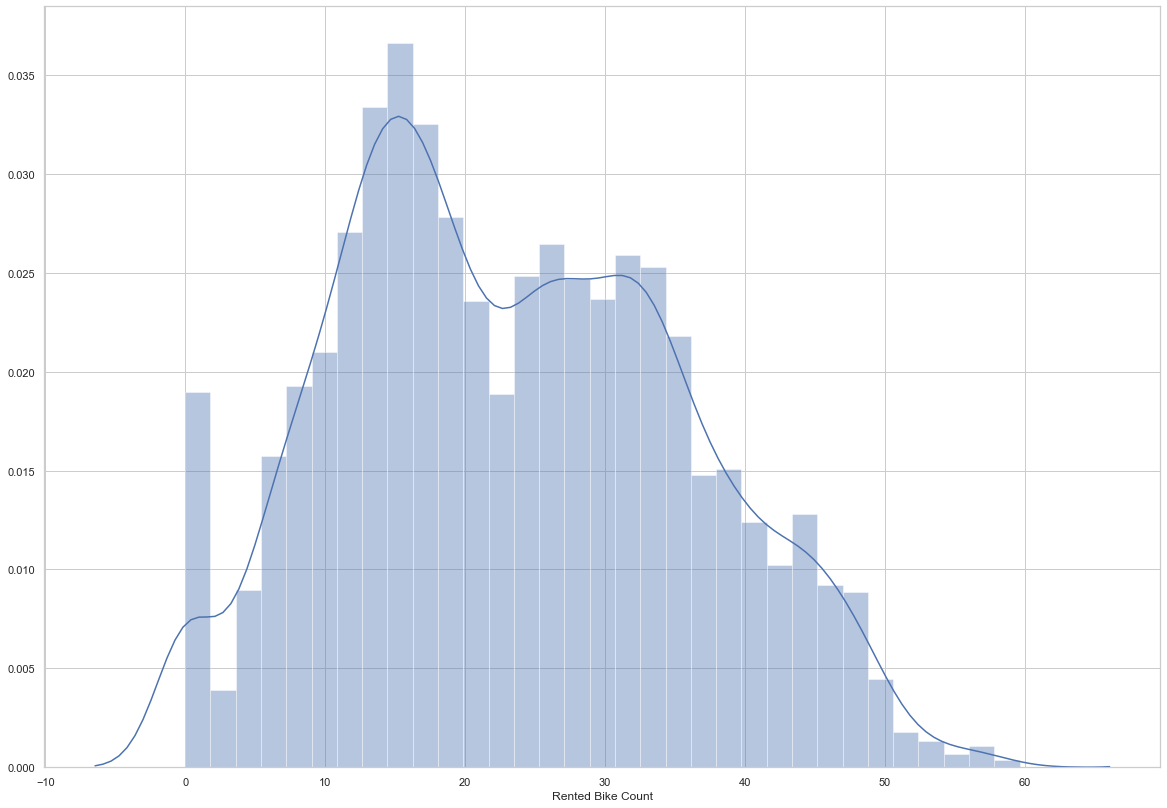

In [46]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [21]:
y_train=np.sqrt(y_train)
y_test=np.sqrt(y_test)

In [22]:
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     595.4
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:49:26   Log-Likelihood:                -22416.
No. Observations:                7008   AIC:                         4.491e+04
Df Residuals:                    6967   BIC:                         4.520e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      23.4040      0.071    329.395      0.000      23.265      23.543
Temperature(°C)             5.5350      0.222     24.885      0.000       5.099       5.971
Humidity(%)                -2.9092      0.097    -29.959      0.000      -3.100      -2.719
Solar Radiation (MJ/m2)     0.6140      0.150      4.081      0.000       0.319       0.909
Rainfall(mm)               -1.9338      0.079    -24.573      0.000      -2.088      -1.780
Hour_1                     -0.3857      0.099     -3.904      0.000      -0.579      -0.192
Hour_2                     -0.9744      0.099     -9.863      0.000      -1.168      -0.781
Hour_3                     -1.4471      0.099    -14.591      0.000      -1.641      -1.253
Hour_4                     -1.9306      0.099    -19.450      0.000      -2.125      -1.736
Hour_5                     -1.8431      0.099    -18.587      0.000      -2.037      -1.649
Hour_6                     -0.9095      0.099     -9.186      0.000      -1.104      -0.715
Hour_7                      0.3655      0.099      3.674      0.000       0.170       0.561
Hour_8                      1.4451      0.101     14.355      0.000       1.248       1.642
Hour_9                      0.2493      0.102      2.450      0.014       0.050       0.449
Hour_10                    -0.6568      0.106     -6.206      0.000      -0.864      -0.449
Hour_11                    -0.6434      0.109     -5.897      0.000      -0.857      -0.430
Hour_12                    -0.4938      0.113     -4.352      0.000      -0.716      -0.271
Hour_13                    -0.5106      0.115     -4.436      0.000      -0.736      -0.285
Hour_14                    -0.5686      0.114     -4.998      0.000      -0.792      -0.346
Hour_15                    -0.3296      0.110     -2.994      0.003      -0.545      -0.114
Hour_16                     0.0441      0.106      0.416      0.678      -0.164       0.252
Hour_17                     0.8419      0.104      8.119      0.000       0.639       1.045
Hour_18                     2.0187      0.101     20.054      0.000       1.821       2.216
Hour_19                     1.4006      0.100     14.045      0.000       1.205       1.596
Hour_20                     1.2517      0.099     12.602      0.000       1.057       1.446
Hour_21                     1.3022      0.099     13.142      0.000       1.108       1.496
Hour_22                     1.0720      0.100     10.755      0.000       0.877       1.267
Hour_23                     0.3059      0.099      3.101      0.002       0.112       0.499
Holiday_No Holiday          0.7183      0.072      9.972      0.000       0.577       0.860
Functioning Day_Yes         5.1999      0.074     70.551      0.000       5.055       5.344
month_August               -0.7592      0.127  

In [49]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [50]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.75055614 0.78332994 0.78472118 0.76042205 0.76718815]

Minimum score obtained:  0.7506
Maximum score obtained:  0.7847
Average score obtained:  0.7692


The model with transformed target variable is also validated with K-Fold cross validation and the R-squared value is found to be almost equal with the OLS model.

In [51]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)

update_score_card(algorithm_name = 'Linear Regression (after transformation)', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression,-,-,0.694447,0.692649,356.4419,356.1272
1,Linear Regression (after transformation),-,-,0.773672,0.772340,5.9283,5.9915


# Assumptions After MLR Model

Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:
1. Linear Relationship Between Dependent and Independent Variable
2. Autocorrelation
3. Heteroscedasticity
4. Tests of Normality 

# Linear Relationship between Dependent and Independent Variable

An assumption of linear regression is that it should be linear in the parameter. To check the linearity we plot a graph of residuals and each independent variable. If the plot shows no specific pattern then we can conclude the presence of linearity.

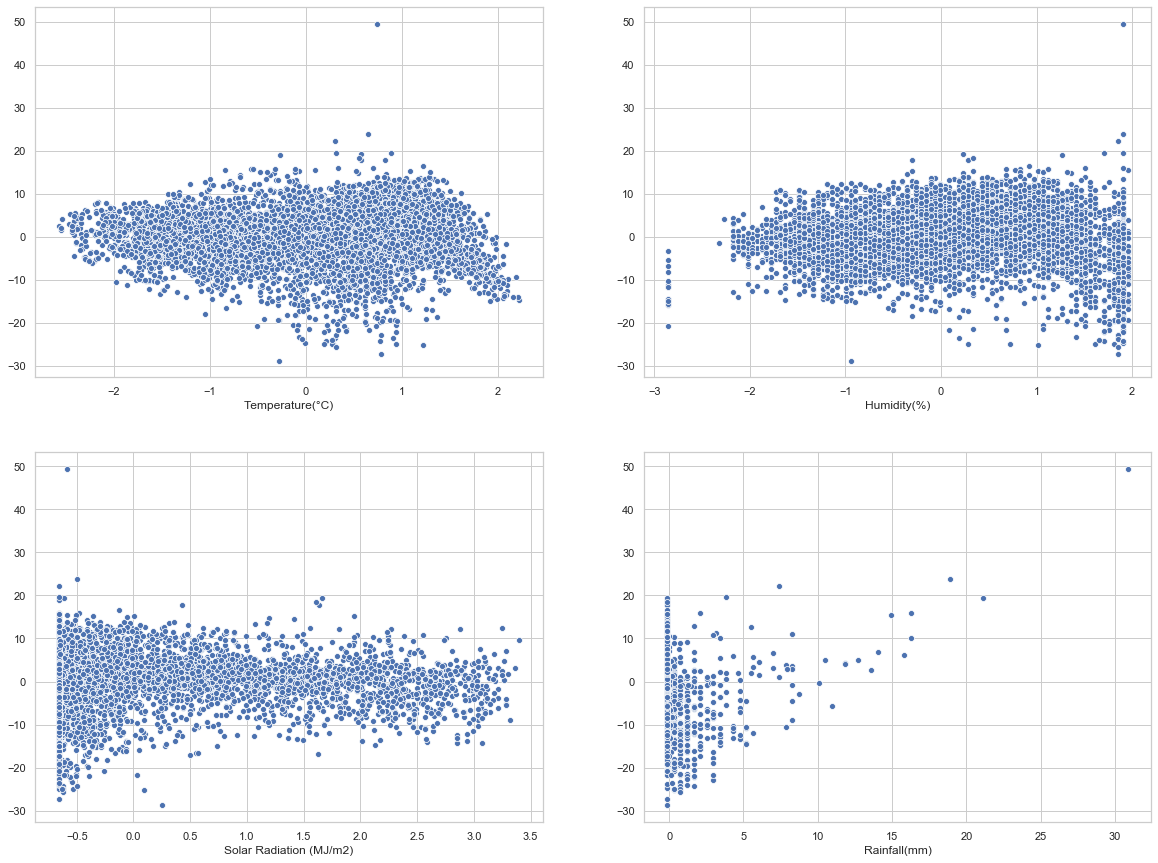

In [52]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))
for variable, subplot in zip(X_train.columns[1:], ax.flatten()):
    sns.scatterplot(X_train[variable], model.resid , ax=subplot)
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

# Autocorrelation

**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 2.006). Thus, we conclude that there is no autocorrelation.

# Check for normality

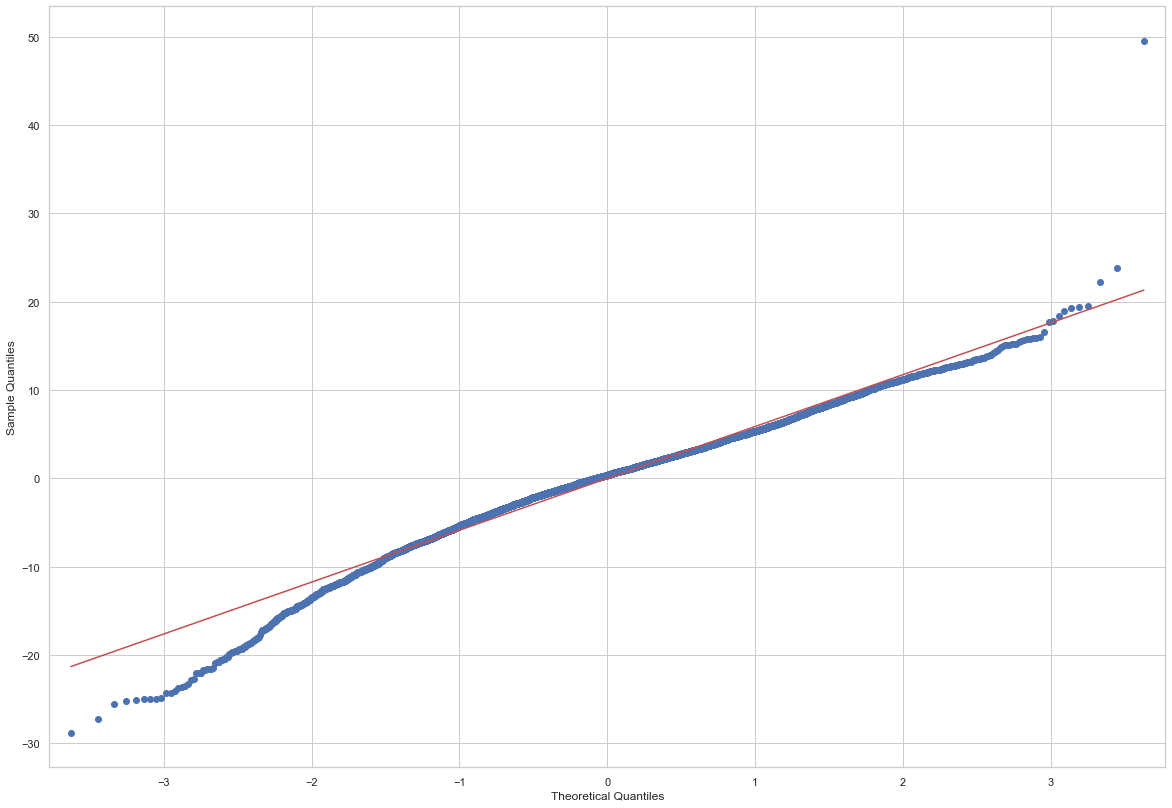

In [53]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line = 'r')
plt.show()

The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As, the points are close to the diagonal line, we conclude that the residuals follow a near normal distribution.

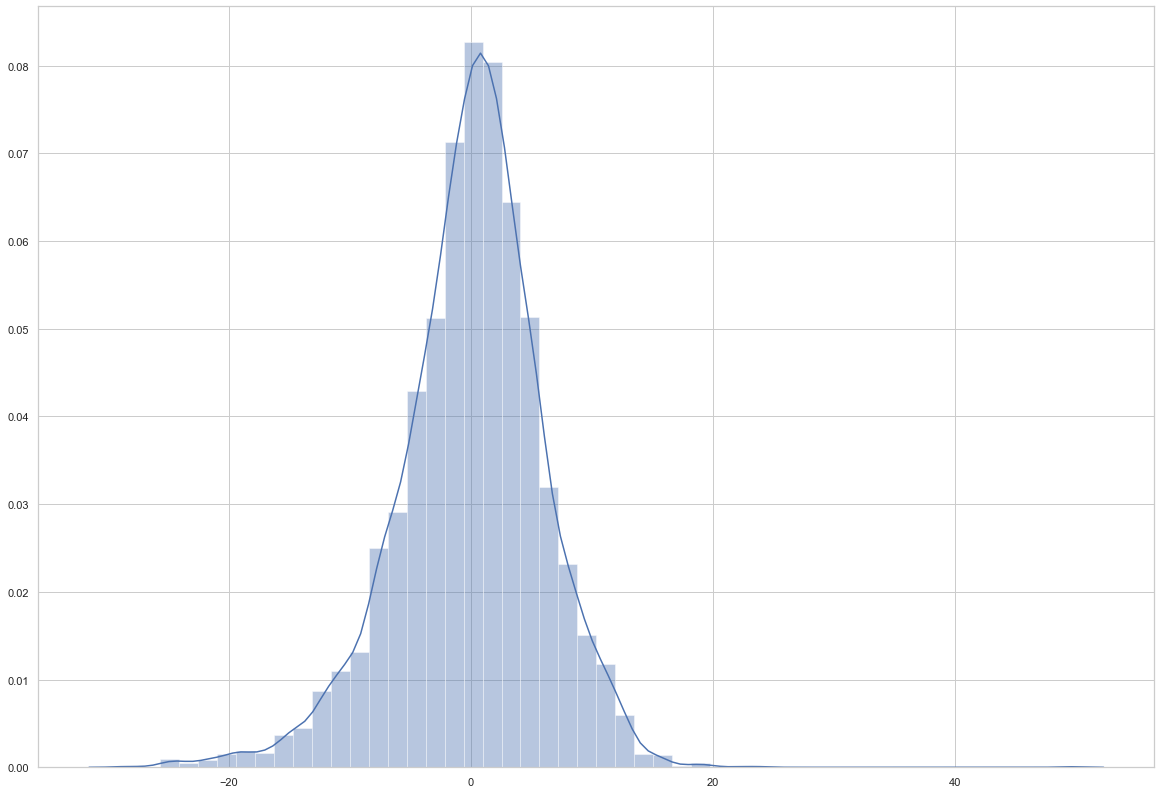

In [54]:
train_pred = model.predict(X_train)
sns.distplot(y_train-train_pred)

So from the above distribution we can say thatresiduals follow almost a gaussian distribution.

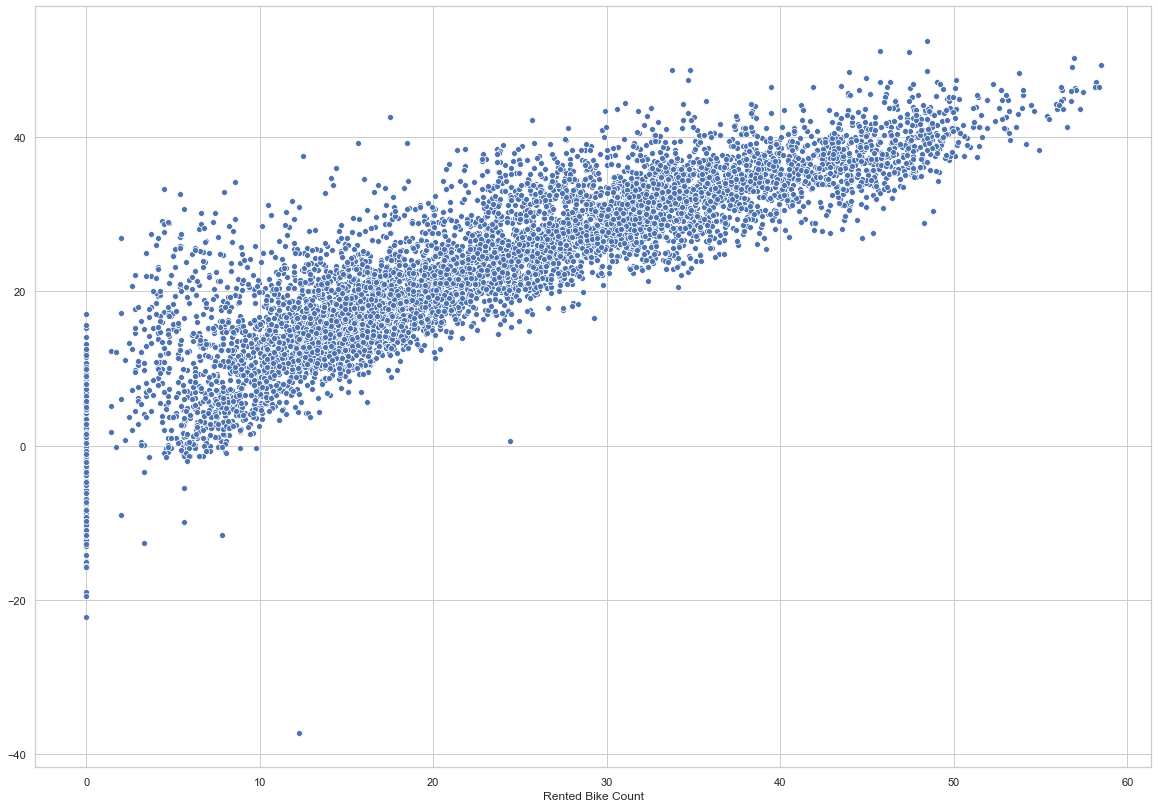

In [55]:
sns.scatterplot(y_train,train_pred)

The scatterplot between the training values and the predicted values are almost linear.

## Shapiro test

In [56]:
from scipy.stats import shapiro
shapiro(y_train-train_pred)

C:\Users\suvar\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9793869256973267, 1.1172318666994875e-30)

## Heteroskedasticity

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [57]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test[2:])

[('f-value', 53.835441182170705), ('p-value', 0.0)]

**Interpretation:** We observe that the p-value is less than 0.05; thus, we conclude that there is heteroscedasticity present in the data.

# Model Significance

<p style='text-indent:25em'> <strong> H<sub>o</sub>: β<sub>1</sub> = 0 </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: β<sub>1</sub> ≠ 0 </strong> (i.e. regression model is significant) </p>

In [58]:
model.f_pvalue

0.0

From the above output we can see that the probability for F-statistic i.e the associated p-value is far less than the significance level 0.05, hence we can reject the Ho and conclude that the regression model is significant.

# Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

R-squared for train data 0.9840731493613052
R-squared for test data 0.8949180166598153


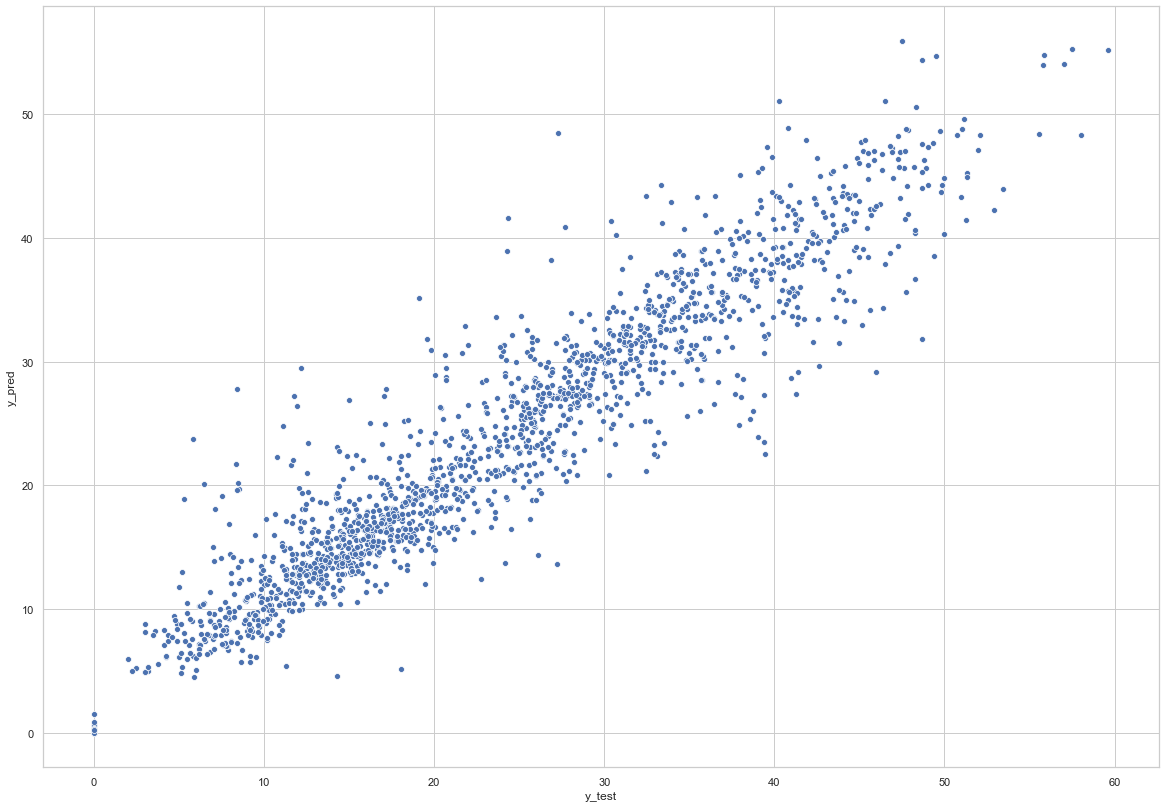

In [60]:
y_pred = reg_rf.predict(X_test)
print("R-squared for train data",reg_rf.score(X_train, y_train))
print("R-squared for test data",reg_rf.score(X_test, y_test))
sns.scatterplot(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [61]:
update_score_card(algorithm_name = 'Random forest',model = reg_rf)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression,-,-,0.694447,0.692649,356.4419,356.1272
1,Linear Regression (after transformation),-,-,0.773672,0.772340,5.9283,5.9915
2,Random forest,-,-,0.984073,0.983979,1.5726,4.0217


# Conclusions

1. We have used Simple Linear Regression technique to build our prediction model.
2. We found that the adjusted R squared value is almost equal to the score of K Fold Validation technique.
3. We can conclude that the model performance is consistent across the train and test datasets.
4. We have tried using the Random Forest technique and got a good train score.
5. In future, we would like to use Non Linear regression techniques to improve prediction.

![Text](3.JPG)

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [24]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [25]:
update_score_card(algorithm_name = 'Ridge',model = ridge,alpha=1)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Ridge,1,-,0.773672,0.77234,5.9283,5.9916


In [26]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=500,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
update_score_card(algorithm_name = 'Lasso',model = lasso,alpha=1)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Ridge,1,-,0.773672,0.772340,5.9283,5.9916
1,Lasso,1,-,0.773638,0.772306,5.9287,5.9915


In [28]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)



In [29]:
update_score_card(algorithm_name = 'SGD',model = sgd,alpha=1)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Ridge,1,-,0.773672,0.772340,5.9283,5.9916
1,Lasso,1,-,0.773638,0.772306,5.9287,5.9915
2,SGD,1,-,0.768182,0.766817,5.9998,6.0242
